## Package Imports and Reading In of Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Martin Marietta Pricing Case Study/data/seasonal_imbalanced_shipment_data_100000.csv')
df.head()

,shipment_month,region,product_category,product_id,customer_id,transfer_flag,pickup_or_delivery,Job_distance,Shipment_qty,avg_price_per_ton
0,Aug,Region B,Chemicals,P2749,C851689,External Customer,Delivery,20+,3.76,957.82
1,Sep,Region D,Chemicals,P9251,C427394,External Customer,Pickup,20+,16.03,788.16
2,Jun,Region C,Furniture,P3480,C493568,External Customer,Delivery,20+,24.92,768.94
3,Oct,Region C,Textiles,P1032,C802937,External Customer,Delivery,0-5,10.34,573.17
4,Nov,Region A,Food,P3497,C493495,External Customer,Delivery,15-20,35.13,501.47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shipment_month      100000 non-null  object 
 1   region              100000 non-null  object 
 2   product_category    100000 non-null  object 
 3   product_id          100000 non-null  object 
 4   customer_id         100000 non-null  object 
 5   transfer_flag       100000 non-null  object 
 6   pickup_or_delivery  100000 non-null  object 
 7   Job_distance        100000 non-null  object 
 8   Shipment_qty        100000 non-null  float64
 9   avg_price_per_ton   100000 non-null  float64
dtypes: float64(2), object(8)
memory usage: 7.6+ MB


In [4]:
df_categorical = df.select_dtypes(include='object')
df_categorical.drop(['product_id','customer_id'],axis=1,inplace=True)
df_categorical.head()

,shipment_month,region,product_category,transfer_flag,pickup_or_delivery,Job_distance
0,Aug,Region B,Chemicals,External Customer,Delivery,20+
1,Sep,Region D,Chemicals,External Customer,Pickup,20+
2,Jun,Region C,Furniture,External Customer,Delivery,20+
3,Oct,Region C,Textiles,External Customer,Delivery,0-5
4,Nov,Region A,Food,External Customer,Delivery,15-20


In [5]:
df_categorical = pd.get_dummies(df_categorical,drop_first=True)
df_categorical.head()

,shipment_month_Aug,shipment_month_Dec,shipment_month_Feb,shipment_month_Jan,shipment_month_Jul,shipment_month_Jun,shipment_month_Mar,shipment_month_May,shipment_month_Nov,shipment_month_Oct,...,product_category_Electronics,product_category_Food,product_category_Furniture,product_category_Textiles,transfer_flag_Plant-to-Plant,pickup_or_delivery_Pickup,Job_distance_10-15,Job_distance_15-20,Job_distance_20+,Job_distance_5-10
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [6]:
df_numerical = df.select_dtypes(exclude='object')
df_numerical.head()

,Shipment_qty,avg_price_per_ton
0,3.76,957.82
1,16.03,788.16
2,24.92,768.94
3,10.34,573.17
4,35.13,501.47


In [7]:
df_coded = pd.concat([df_numerical,df_categorical],axis=1)
df_coded.head()

,Shipment_qty,avg_price_per_ton,shipment_month_Aug,shipment_month_Dec,shipment_month_Feb,shipment_month_Jan,shipment_month_Jul,shipment_month_Jun,shipment_month_Mar,shipment_month_May,...,product_category_Electronics,product_category_Food,product_category_Furniture,product_category_Textiles,transfer_flag_Plant-to-Plant,pickup_or_delivery_Pickup,Job_distance_10-15,Job_distance_15-20,Job_distance_20+,Job_distance_5-10
0,3.76,957.82,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,16.03,788.16,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,24.92,768.94,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,10.34,573.17,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,35.13,501.47,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


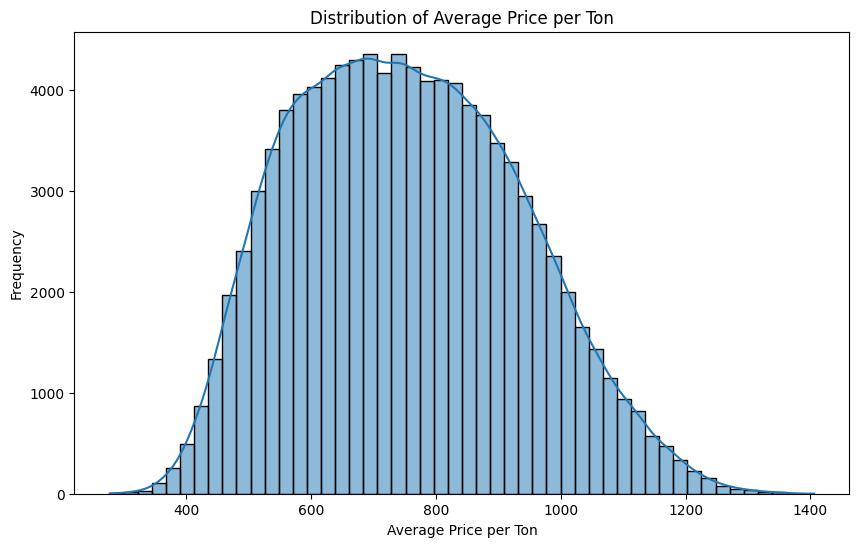

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_price_per_ton'], bins=50, kde=True)
plt.title('Distribution of Average Price per Ton')
plt.xlabel('Average Price per Ton')
plt.ylabel('Frequency')
plt.show()

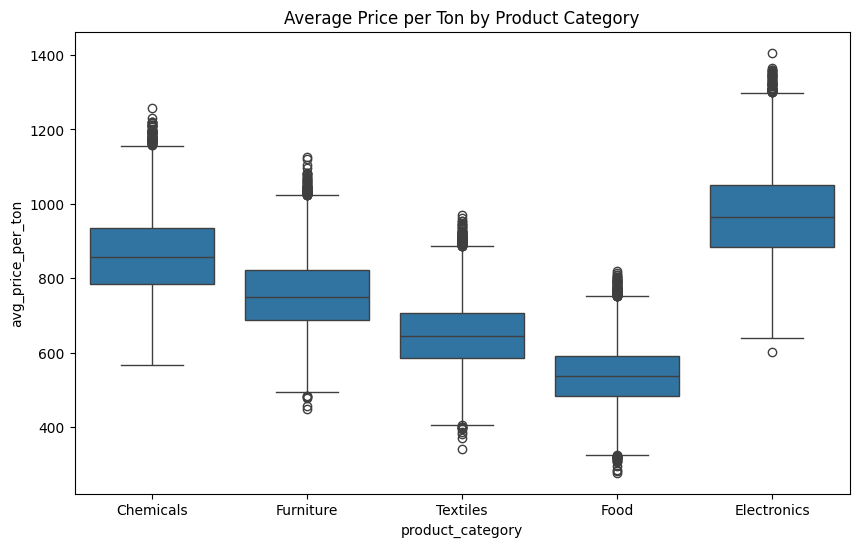

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category', y='avg_price_per_ton', data=df)
plt.title('Average Price per Ton by Product Category')
plt.show()

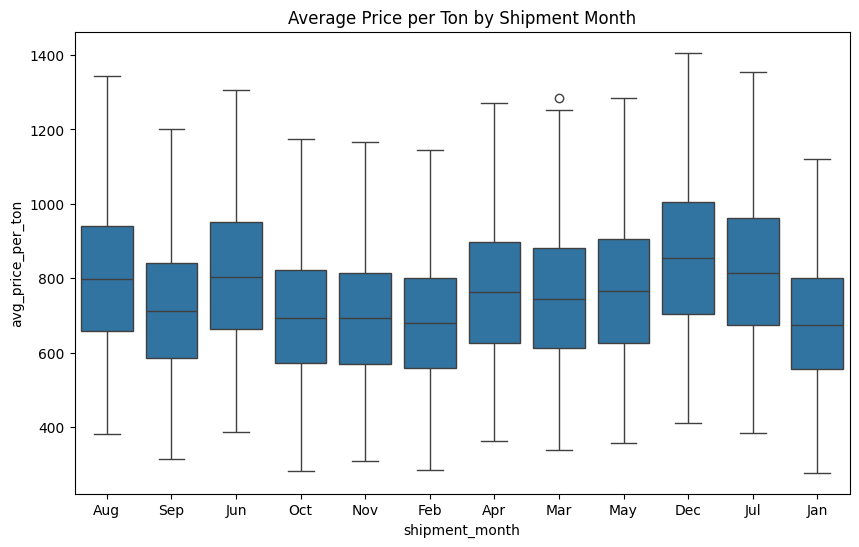

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipment_month', y='avg_price_per_ton', data=df)
plt.title('Average Price per Ton by Shipment Month')
plt.show()

In [11]:
df['quarter'] = df['shipment_month'].map({'Jan': 1, 'Feb': 1, 'Mar': 1, 'Apr': 2, 'May': 2, 'Jun': 2, 'Jul': 3, 'Aug': 3, 'Sep': 3, 'Oct': 4, 'Nov': 4, 'Dec': 4})


job_distance_order = {'0-5': 1, '5-10': 2, '10-15': 3, '15-20': 4, '20+': 5}
df['Job_distance_encoded'] = df['Job_distance'].map(job_distance_order)


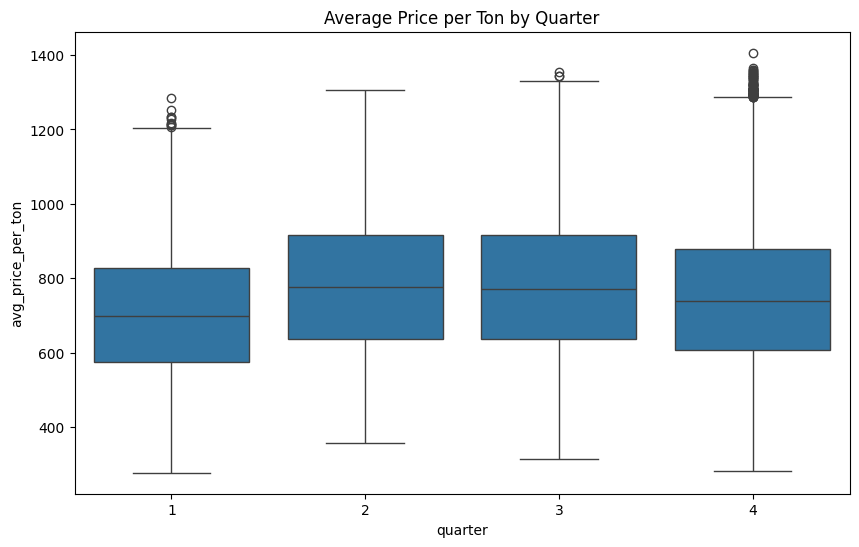

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='avg_price_per_ton', data=df)
plt.title('Average Price per Ton by Quarter')
plt.show()

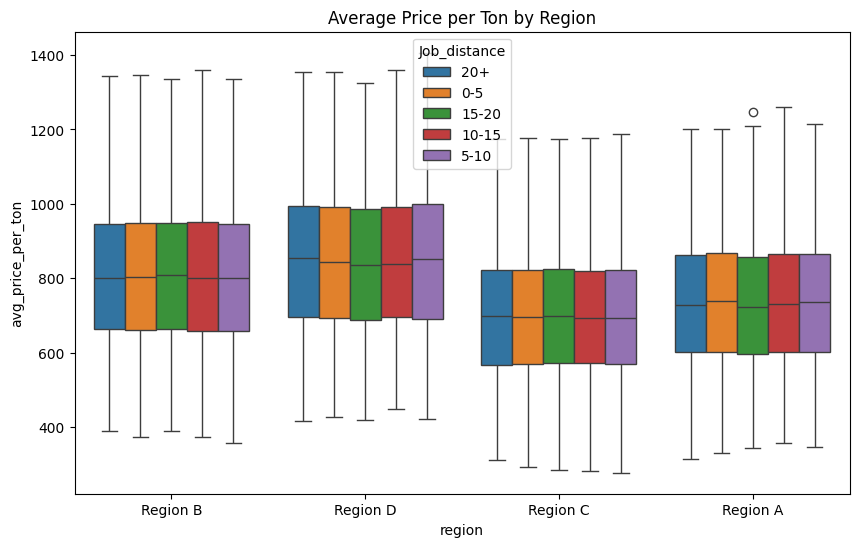

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='avg_price_per_ton', hue='Job_distance', data=df)
plt.title('Average Price per Ton by Region')
plt.show()

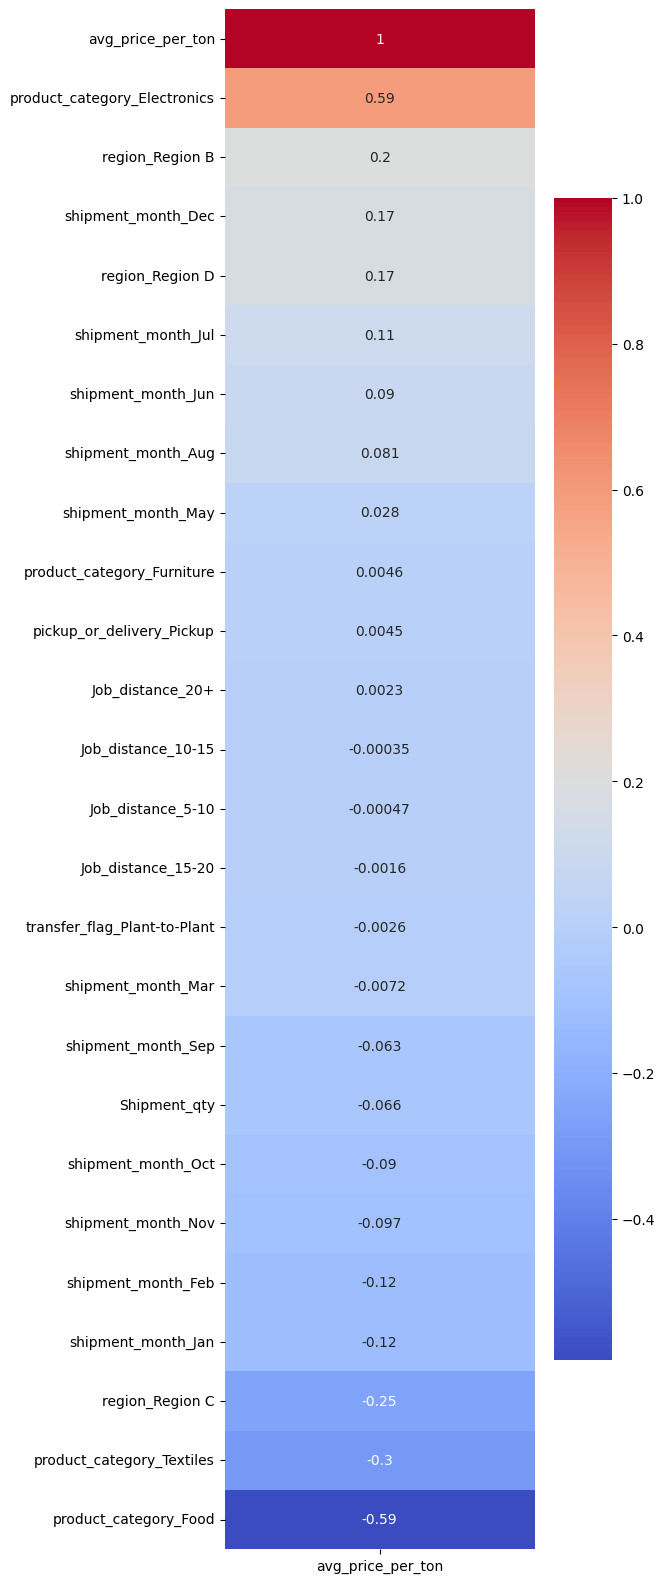

In [14]:
plt.figure(figsize = (5,20))

sns.heatmap(df_coded.corr()[['avg_price_per_ton']].sort_values(by = 'avg_price_per_ton', ascending = False),
            annot = True,
            vmax = 1,
            cmap = 'coolwarm');

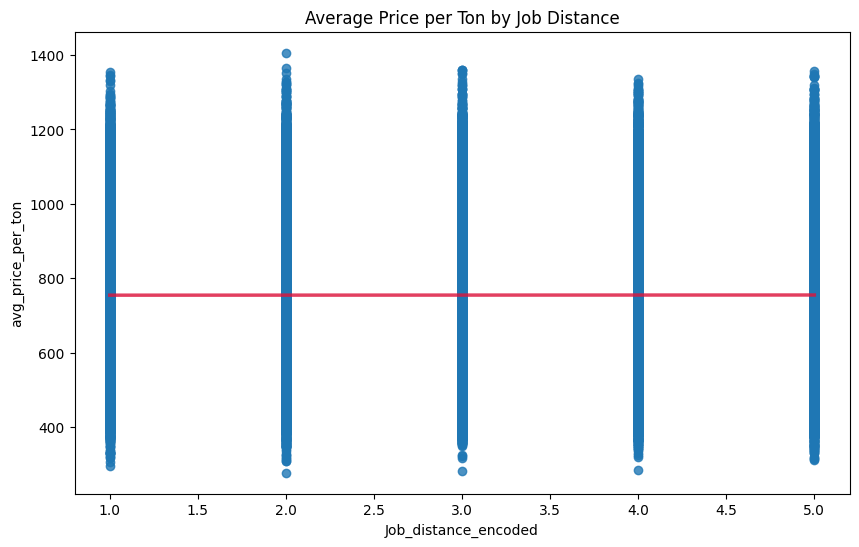

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Job_distance_encoded', y='avg_price_per_ton', line_kws={'color': 'crimson', 'linewidth': 2.5, 'alpha': 0.8}, data=df)
plt.title('Average Price per Ton by Job Distance')
plt.show()

## Brief Exploratory Summary: Key Drivers of Price

In [16]:
# Encode and fit a quick model
features = ['shipment_month', 'region', 'product_category', 'transfer_flag',
            'pickup_or_delivery', 'Job_distance', 'Shipment_qty']

X = df[features]
y = df['avg_price_per_ton']

# One-hot encoding for categoricals
categorical = X.select_dtypes(include='object').columns.tolist()
numeric = ['Shipment_qty']

preprocessor = make_column_transformer(
    # (OneHotEncoder(drop='first'), categorical),
    (OneHotEncoder(), categorical),
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
columns = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a Dataframe
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=columns)


In [17]:
model = LinearRegression()
model.fit(X_encoded, y)

# Create summary table
feature_names = preprocessor.get_feature_names_out()
coefs = pd.Series(model.coef_, index=feature_names, name='Coefficient').sort_values(key=abs, ascending=False)

coefs.head(10)


,Coefficient
onehotencoder__product_category_Electronics,215.710382
onehotencoder__product_category_Food,-215.486939
onehotencoder__product_category_Textiles,-107.782125
onehotencoder__product_category_Chemicals,107.489165
onehotencoder__shipment_month_Dec,105.382160
onehotencoder__shipment_month_Feb,-74.559783
onehotencoder__region_Region D,73.676297
onehotencoder__shipment_month_Jan,-73.551625
onehotencoder__region_Region C,-73.482861
onehotencoder__shipment_month_Jul,68.406666


## Define Pricing Bands with Tree-Based Segmentation (CHAID-style logic)

Use a shallow DecisionTreeRegressor to mimic a CHAID-style segmentation:

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_text

tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, random_state=42)
tree.fit(X_encoded, y)

# Display segmentation rules
tree_rules = export_text(tree, feature_names=list(feature_names))
print(tree_rules)


|--- onehotencoder__product_category_Food <= 0.50
|   |--- onehotencoder__product_category_Textiles <= 0.50
|   |   |--- onehotencoder__product_category_Electronics <= 0.50
|   |   |   |--- value: [809.48]
|   |   |--- onehotencoder__product_category_Electronics >  0.50
|   |   |   |--- value: [970.56]
|   |--- onehotencoder__product_category_Textiles >  0.50
|   |   |--- onehotencoder__region_Region C <= 0.50
|   |   |   |--- value: [678.49]
|   |   |--- onehotencoder__region_Region C >  0.50
|   |   |   |--- value: [600.77]
|--- onehotencoder__product_category_Food >  0.50
|   |--- onehotencoder__region_Region C <= 0.50
|   |   |--- onehotencoder__region_Region A <= 0.50
|   |   |   |--- value: [586.66]
|   |   |--- onehotencoder__region_Region A >  0.50
|   |   |   |--- value: [525.50]
|   |--- onehotencoder__region_Region C >  0.50
|   |   |--- onehotencoder__shipment_month_Dec <= 0.50
|   |   |   |--- value: [493.80]
|   |   |--- onehotencoder__shipment_month_Dec >  0.50
|   |   |

In [ ]:
def predict_price(row):
    # The DecisionTreeRegressor object 'tree' is available in the global scope
    # We can use it directly to predict the price for the given row.
    # The tree expects input in the same format as X_encoded, so we need to
    # convert the row (which is a Series) into a DataFrame with the correct
    # feature names and shape before passing it to tree.predict().

    # Convert the row to a DataFrame, ensuring it has the same columns as X_encoded_df
    row_df = row.to_frame().T

    # Use the trained tree to predict the price for this row
    predicted_value = tree.predict(row_df)

    # tree.predict returns an array, so we extract the single predicted value
    return predicted_value[0]

# Apply the function
X_encoded_df['predicted_price'] = X_encoded_df.apply(predict_price, axis=1)

In [ ]:
X_encoded_df.head()

## Generate Pricing Bands for Selected Segments

In [ ]:
# Define custom segments
segments = {
    'Electronics_Dec': df.query("product_category == 'Electronics' and shipment_month == 'Dec'"),
    'Furniture_July': df.query("product_category == 'Furniture' and shipment_month == 'Jul'"),
    'Chemicals_Q1': df[df['product_category'].eq('Chemicals') & df['shipment_month'].isin(['Jan', 'Feb', 'Mar'])]
}

# Calculate bands
pricing_bands = {}
for name, group in segments.items():
    band = {
        'floor': group['avg_price_per_ton'].quantile(0.10),
        'middle': group['avg_price_per_ton'].median(),
        'ceiling': group['avg_price_per_ton'].quantile(0.90)
    }
    pricing_bands[name] = band

pd.DataFrame(pricing_bands).T


In [ ]:
def price_prediction(row):
    if row['product_category_Electronics'] <= 0.5:
        if row['shipment_month_Dec'] <= 0.5:
            return 780.0
        else:
            return 870.0
    else:
        return 920.0
